In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [2]:
def compute_affinity_matrix(data, sigma=1.0):
    distance_matrix = cdist(data, data, 'euclidean')
    affinity_matrix = np.exp(-distance_matrix / (2 * sigma**2))
    return affinity_matrix

def compute_degree_matrix(affinity_matrix):
    return np.diag(np.sum(affinity_matrix, axis=1))

def compute_laplacian_matrix(affinity_matrix, degree_matrix):
    return degree_matrix - affinity_matrix

def ratio_cut_clustering(data, num_clusters):
    # Step 1: Compute affinity matrix
    affinity_matrix = compute_affinity_matrix(data)
    
    # Step 2: Compute degree matrix
    degree_matrix = compute_degree_matrix(affinity_matrix)
    
    # Step 3: Compute Laplacian matrix
    laplacian_matrix = compute_laplacian_matrix(affinity_matrix, degree_matrix)
    
    # Step 4: Compute the eigenvectors corresponding to the smallest eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    
    # Step 5: Perform clustering using the eigenvectors
    cluster_labels = KMeans(n_clusters=num_clusters).fit_predict(eigenvectors[:, 1:num_clusters])
    
    return cluster_labels

In [3]:
def kmeans_clustering(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels

In [14]:
def resize_image(image, size=(64, 64)):
    return cv2.resize(image, size)

def flatten_image(image):
    return image.flatten().reshape(-1, 1)

def reconstruct_image(flattened_image, original_shape):
    return flattened_image.reshape(original_shape)

def visualize_images(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 6))
    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

In [16]:
# Load the images
image1 = cv2.imread("data/image1.jpg")
image2 = cv2.imread("data/image2.jpg")

# Resize images to 64x64
resized_image1 = resize_image(image1)
resized_image2 = resize_image(image2)

# Convert images to grayscale
gray_image1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2GRAY)

# Flatten images
flattened_image1_gray = flatten_image(gray_image1)
flattened_image2_gray = flatten_image(gray_image2)
flattened_image1_rgb = flatten_image(resized_image1)
flattened_image2_rgb = flatten_image(resized_image2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

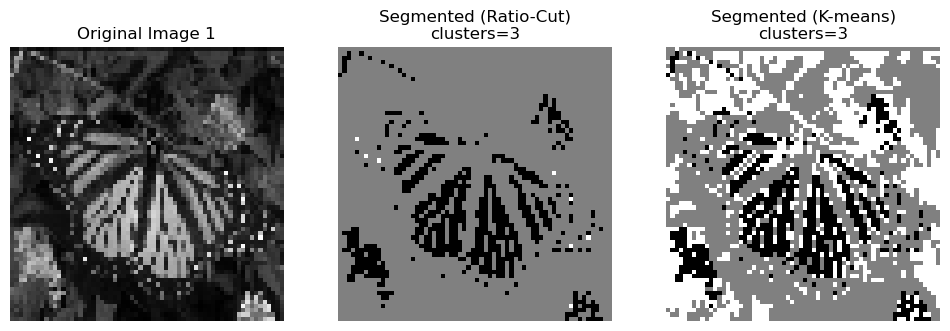

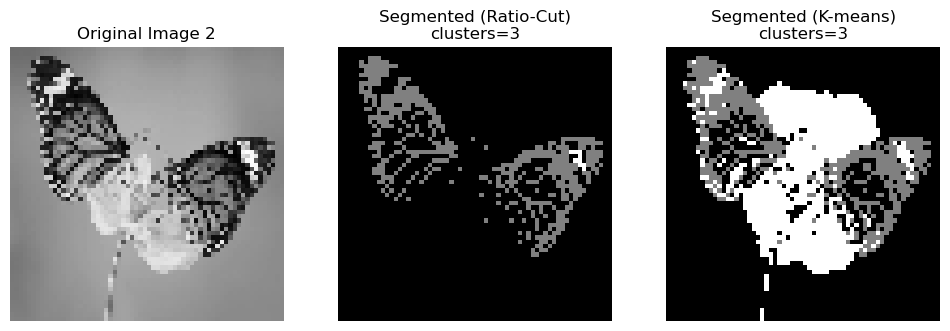

In [18]:
# Apply clustering techniques (Ratio-Cut and K-means)
num_clusters = 3
ratio_cut_labels1 = ratio_cut_clustering(flattened_image1_gray, num_clusters)
kmeans_labels1 = kmeans_clustering(flattened_image1_gray, num_clusters)

ratio_cut_labels2 = ratio_cut_clustering(flattened_image2_gray, num_clusters)
kmeans_labels2 = kmeans_clustering(flattened_image2_gray, num_clusters)

# Reshape the clustered labels back into images
segmented_ratio_cut_image1 = reconstruct_image(ratio_cut_labels1, gray_image1.shape)
segmented_kmeans_image1 = reconstruct_image(kmeans_labels1, gray_image1.shape)

segmented_ratio_cut_image2 = reconstruct_image(ratio_cut_labels2, gray_image2.shape)
segmented_kmeans_image2 = reconstruct_image(kmeans_labels2, gray_image2.shape)

# Visualize the segmented images
visualize_images([gray_image1, segmented_ratio_cut_image1, segmented_kmeans_image1],
                 ["Original Image 1", f"Segmented (Ratio-Cut)\nclusters={num_clusters}", f"Segmented (K-means)\nclusters={num_clusters}"])

visualize_images([gray_image2, segmented_ratio_cut_image2, segmented_kmeans_image2],
                 ["Original Image 2", f"Segmented (Ratio-Cut)\nclusters={num_clusters}", f"Segmented (K-means)\nclusters={num_clusters}"])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

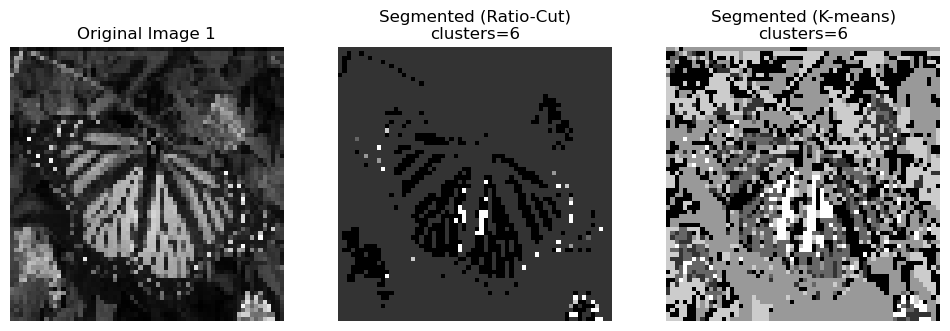

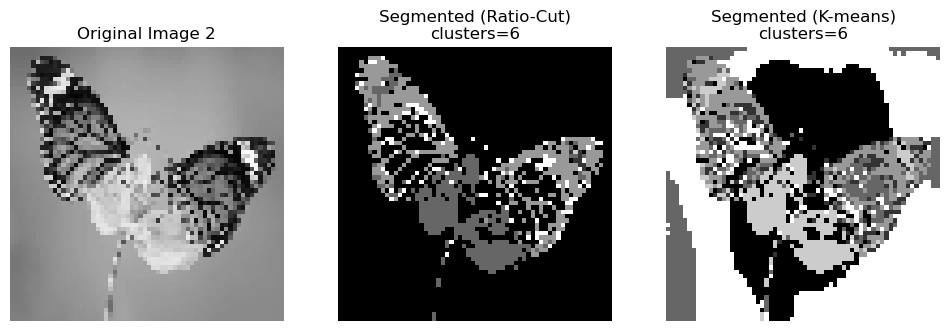

In [19]:
# Apply clustering techniques (Ratio-Cut and K-means)
num_clusters = 6
ratio_cut_labels1 = ratio_cut_clustering(flattened_image1_gray, num_clusters)
kmeans_labels1 = kmeans_clustering(flattened_image1_gray, num_clusters)

ratio_cut_labels2 = ratio_cut_clustering(flattened_image2_gray, num_clusters)
kmeans_labels2 = kmeans_clustering(flattened_image2_gray, num_clusters)

# Reshape the clustered labels back into images
segmented_ratio_cut_image1 = reconstruct_image(ratio_cut_labels1, gray_image1.shape)
segmented_kmeans_image1 = reconstruct_image(kmeans_labels1, gray_image1.shape)

segmented_ratio_cut_image2 = reconstruct_image(ratio_cut_labels2, gray_image2.shape)
segmented_kmeans_image2 = reconstruct_image(kmeans_labels2, gray_image2.shape)

# Visualize the segmented images
visualize_images([gray_image1, segmented_ratio_cut_image1, segmented_kmeans_image1],
                 ["Original Image 1", f"Segmented (Ratio-Cut)\nclusters={num_clusters}", f"Segmented (K-means)\nclusters={num_clusters}"])

visualize_images([gray_image2, segmented_ratio_cut_image2, segmented_kmeans_image2],
                 ["Original Image 2", f"Segmented (Ratio-Cut)\nclusters={num_clusters}", f"Segmented (K-means)\nclusters={num_clusters}"])

In [26]:
def read_images_from_folder(folder_path, resize_dim=(64, 64)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')) and os.path.isfile(os.path.join(folder_path, filename)):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            img = img.resize(resize_dim)
            images.append(np.array(img))
    return images

In [28]:
def flatten_images(images):
    return images.reshape(len(images), -1)

def replace_color_by_mean(image, labels):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        mask = labels == label
        mean_color = np.mean(image[mask], axis=0)
        image[mask] = mean_color.astype(int)
    return image

In [30]:
def compute_affinity_matrix(data, sigma=1.0):
    # Reshape data to 2D array
    n_samples, n_features = data.shape[:2]
    data_2d = data.reshape((n_samples, -1))
    # Compute distance matrix
    distance_matrix = cdist(data_2d, data_2d, 'euclidean')
    # Compute affinity matrix
    affinity_matrix = np.exp(-distance_matrix / (2 * sigma**2))
    return affinity_matrix

In [32]:
def ratio_cut_clustering(data, num_clusters):
    # Step 1: Compute affinity matrix
    affinity_matrix = compute_affinity_matrix(data)
    
    # Step 2: Normalize affinity matrix
    normalized_affinity_matrix = affinity_matrix / np.sum(affinity_matrix, axis=1, keepdims=True)
    
    # Step 3: Perform spectral clustering
    clustering = SpectralClustering(n_clusters=num_clusters, affinity='laplacian')
    cluster_labels = clustering.fit_predict(normalized_affinity_matrix)
    
    
    return cluster_labels

In [42]:
def compare_performance(image_folder, num_clusters_list):
    images = read_images_from_folder(image_folder)
    num_images = len(images)
    fig, axes = plt.subplots(num_images * len(num_clusters_list), 3, figsize=(15, 5*num_images))
    
    for i, image in enumerate(images):
        for j, num_clusters in enumerate(num_clusters_list):
            # Original Image
            axes[i * len(num_clusters_list) + j, 0].imshow(image)
            axes[i * len(num_clusters_list) + j, 0].set_title("Original Image")
            
            # Ratio-Cut based clustering
            ratio_cut_labels = ratio_cut_clustering(image, num_clusters)
            ratio_cut_image = replace_color_by_mean(np.copy(image), ratio_cut_labels)
            axes[i * len(num_clusters_list) + j, 1].imshow(ratio_cut_image)
            axes[i * len(num_clusters_list) + j, 1].set_title(f"Ratio-Cut Clustering with {num_clusters} clusters")
            
            # K-means clustering
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(image.reshape(-1, 3))
            kmeans_labels = kmeans.labels_.reshape(image.shape[:2])
            kmeans_image = replace_color_by_mean(np.copy(image), kmeans_labels)
            axes[i * len(num_clusters_list) + j, 2].imshow(kmeans_image)
            axes[i * len(num_clusters_list) + j, 2].set_title(f"K-Means Clustering with {num_clusters} clusters")
    
    plt.tight_layout()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_spectral.py:688: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_spectral.py:688: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix fr

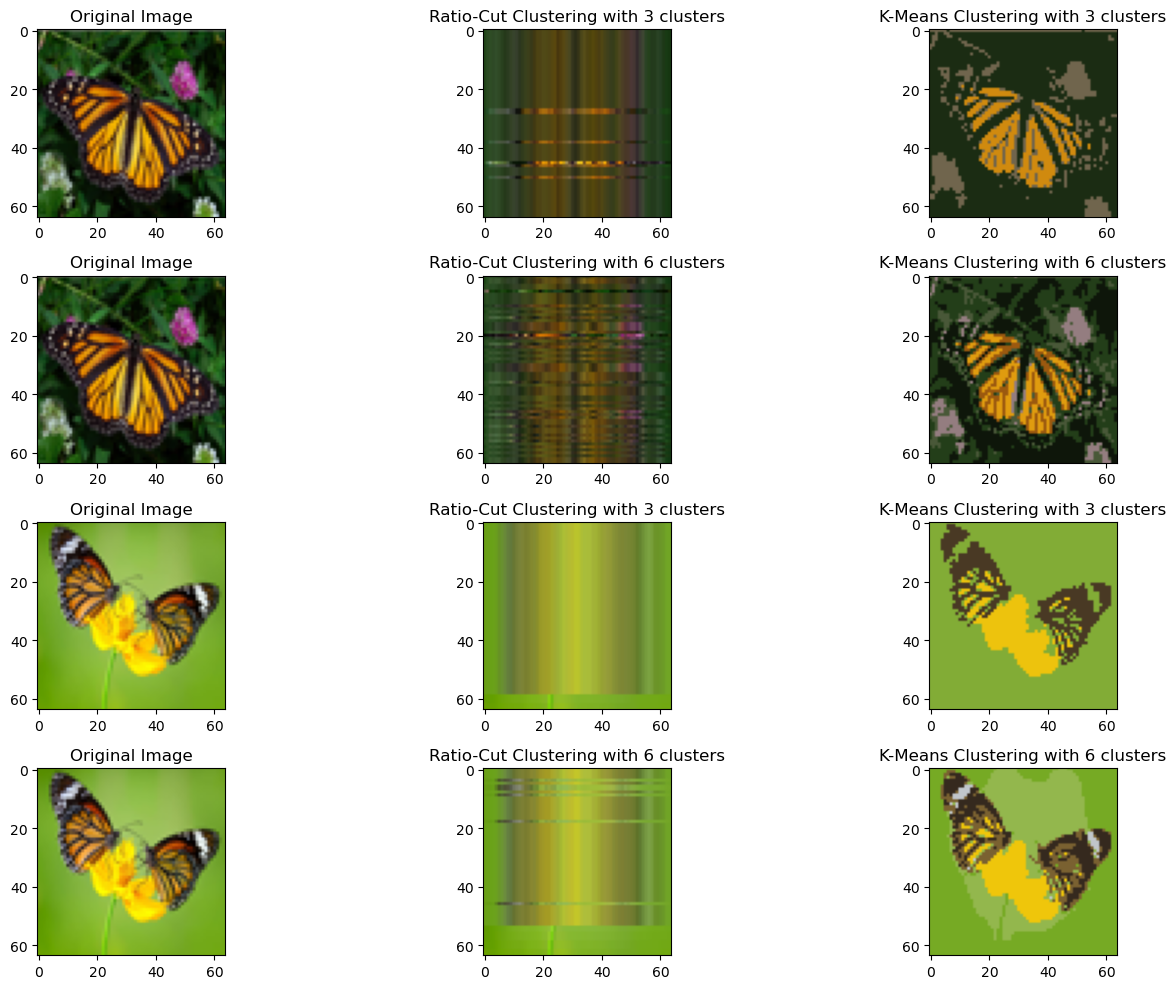

In [44]:
image_folder = "data"
num_clusters_list = [3, 6]
compare_performance(image_folder, num_clusters_list)